In [6]:
import os
os.getcwd()


'C:\\Users\\Hp'

In [9]:
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.hackerearth',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.vscode',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Documents',
 'Downloads',
 'EDA.ipynb',
 'Favorites',
 'iCloudDrive',
 'iCloudPhotos',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Rave.dat',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Videos']

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv('../data/raw_data.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw_data.csv'

In [6]:
import os

os.listdir('..')


['data', 'notebooks']

In [8]:
os.listdir('../data')


['raw_data.csv.xlsx']

In [10]:
import pandas as pd

df = pd.read_excel('../data/raw_data.csv.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.shape


(14999, 8)

In [14]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Dataset Description

- **InvoiceNo**: Unique ID for each transaction (one bill)
- **StockCode**: Unique product code
- **Description**: Product name/description
- **Quantity**: Number of units purchased
- **InvoiceDate**: Date and time when purchase happened
- **UnitPrice**: Price per unit of product
- **CustomerID**: Unique identifier for each customer
- **Country**: Country where the customer is located


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    14999 non-null  object        
 1   StockCode    14999 non-null  object        
 2   Description  14939 non-null  object        
 3   Quantity     14999 non-null  int64         
 4   InvoiceDate  14999 non-null  datetime64[ns]
 5   UnitPrice    14999 non-null  float64       
 6   CustomerID   10728 non-null  float64       
 7   Country      14999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 937.6+ KB


In [19]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,14999.000000,14999,14999.000000,10728.000000
mean,7.464098,2010-12-04 09:36:08.276551680,4.103366,15590.606264
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,1.000000,2010-12-02 12:10:00,1.250000,14213.000000
50%,2.000000,2010-12-05 10:45:00,2.510000,15658.000000
75%,7.000000,2010-12-06 10:08:00,4.210000,17218.000000
max,2880.000000,2010-12-07 15:03:00,950.990000,18239.000000
std,85.930115,NaN,20.106207,1764.101280


## Exploratory Data Overview

In this step, we explored the dataset structure, column names, data types, and summary statistics.
This helped identify missing values, incorrect data types, and potential anomalies that require cleaning.


## Data Quality Checks


In [23]:
df.isnull().sum()


InvoiceNo         0
StockCode         0
Description      60
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4271
Country           0
dtype: int64

### Missing Values
- CustomerID contains missing values, indicating guest or unregistered purchases.
- Other key transactional fields are largely complete.


In [26]:
df[df['Quantity'] <= 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [28]:
df[df['UnitPrice'] <= 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


### Invalid Values
- Negative quantities likely represent returned items.
- Zero or negative unit prices indicate data inconsistencies.
- These records need to be handled before analysis.


In [31]:
df.duplicated().sum()


260

### Duplicate Records
- Duplicate transactions were checked to avoid double counting.


In [51]:
clean_df = df[
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0) &
    (df['CustomerID'].notnull())
]


In [53]:
df.shape, clean_df.shape


((14999, 8), (10576, 8))

## Data Cleaning
- Removed transactions with missing CustomerID.
- Excluded negative quantity and zero-priced items.
- Resulting dataset represents valid purchase behavior.


In [58]:
clean_df = df[
    (df['Quantity'] > 0) &
    (df['UnitPrice'] > 0) &
    (df['CustomerID'].notnull())
].copy()


In [60]:
clean_df['TotalAmount'] = clean_df['Quantity'] * clean_df['UnitPrice']


In [62]:
clean_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Exploratory Data Analysis


In [65]:
total_revenue = clean_df['TotalAmount'].sum()
total_revenue


205882.88999999998

In [67]:
top_products = (
    clean_df.groupby('Description')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Description
REGENCY CAKESTAND 3 TIER              6723.90
BLACK RECORD COVER FRAME              3883.35
WHITE HANGING HEART T-LIGHT HOLDER    3700.00
CHILLI LIGHTS                         3036.54
RED WOOLLY HOTTIE WHITE HEART.        2510.25
HAND WARMER BIRD DESIGN               2292.00
PAPER CHAIN KIT 50'S CHRISTMAS        2228.70
SET 7 BABUSHKA NESTING BOXES          2082.50
ASSORTED COLOUR BIRD ORNAMENT         2009.13
JUMBO BAG RED RETROSPOT               1968.60
Name: TotalAmount, dtype: float64

In [69]:
country_revenue = (
    clean_df.groupby('Country')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
)

country_revenue.head(10)


Country
United Kingdom    186288.65
France              4257.14
Germany             4242.29
EIRE                3788.23
Norway              1919.14
Lithuania           1598.06
Iceland              711.79
Spain                620.00
Italy                427.80
Australia            358.25
Name: TotalAmount, dtype: float64

In [71]:
top_customers = (
    clean_df.groupby('CustomerID')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


CustomerID
15061.0    11429.50
13777.0     6585.16
17850.0     5391.21
16210.0     4738.54
16029.0     4271.52
17381.0     3603.72
17511.0     3470.68
14911.0     3466.03
13089.0     3230.62
13081.0     2366.78
Name: TotalAmount, dtype: float64

In [73]:
top_customers = (
    clean_df.groupby('CustomerID')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


CustomerID
15061.0    11429.50
13777.0     6585.16
17850.0     5391.21
16210.0     4738.54
16029.0     4271.52
17381.0     3603.72
17511.0     3470.68
14911.0     3466.03
13089.0     3230.62
13081.0     2366.78
Name: TotalAmount, dtype: float64

In [77]:
import matplotlib.pyplot as plt


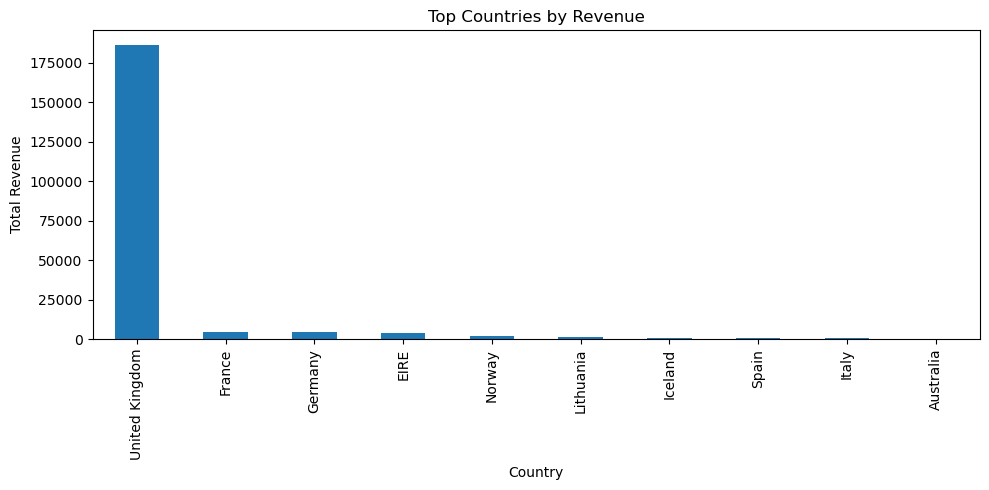

In [79]:
country_revenue.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


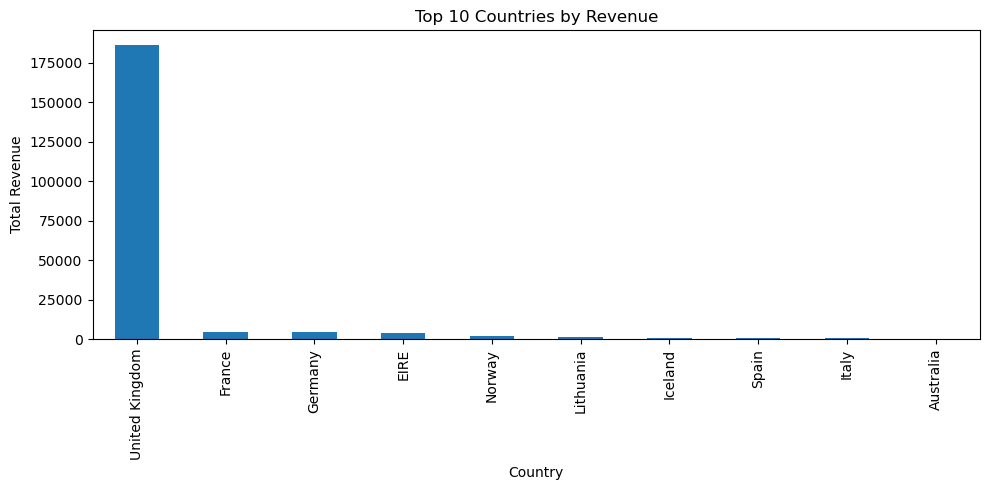

In [81]:
country_revenue.sort_values(ascending=False).head(10).plot(
    kind='bar',
    figsize=(10,5)
)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


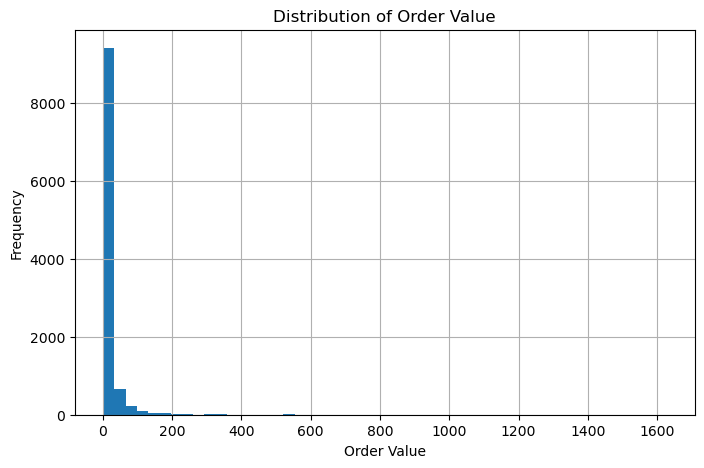

In [83]:
clean_df['TotalAmount'].hist(bins=50, figsize=(8,5))
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


In [85]:
customer_orders = clean_df.groupby('CustomerID')['InvoiceNo'].nunique()

repeat_customers = customer_orders[customer_orders > 1].count()
one_time_customers = customer_orders[customer_orders == 1].count()

repeat_customers, one_time_customers


(67, 346)

In [87]:
avg_spend = (
    clean_df.groupby('CustomerID')['TotalAmount']
    .sum()
    .mean()
)

avg_spend


498.5057869249395

## Key Insights

- Majority of revenue comes from a small set of top products.
- United Kingdom is the primary revenue-generating country.
- Most customers place small orders, with few high-value transactions.
- A significant number of customers are repeat buyers, indicating customer retention.


In [90]:
customer_summary = clean_df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',        # number of orders
    'Quantity': 'sum',             # total items bought
    'TotalAmount': 'sum'           # total spend
}).reset_index()

customer_summary.rename(columns={
    'InvoiceNo': 'NumOrders',
    'Quantity': 'TotalItems',
    'TotalAmount': 'TotalSpend'
}, inplace=True)

customer_summary.head()


,CustomerID,NumOrders,TotalItems,TotalSpend
0,12347.0,1,319,711.79
1,12395.0,1,528,346.10
2,12427.0,1,79,303.50
3,12431.0,1,107,358.25
4,12433.0,1,1852,1919.14


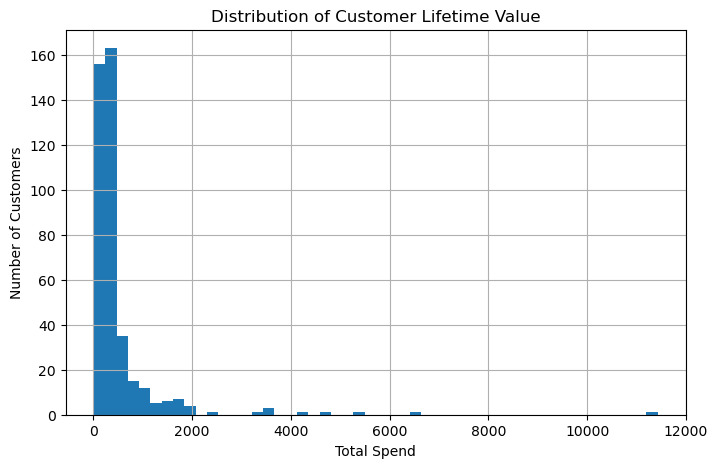

In [92]:
customer_summary['TotalSpend'].hist(bins=50, figsize=(8,5))
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


Most customers have low lifetime value, while a small number of customers contribute very high total spend, indicating a skewed revenue distribution.

In [95]:
threshold = customer_summary['TotalSpend'].quantile(0.90)
high_value_customers = customer_summary[customer_summary['TotalSpend'] >= threshold]

high_value_customers.shape


(42, 4)

In [97]:
high_value_customers.head()


,CustomerID,NumOrders,TotalItems,TotalSpend
4,12433.0,1,1852,1919.14
5,12472.0,1,972,1631.30
7,12567.0,2,778,1942.38
10,12647.0,3,245,968.80
12,12681.0,1,585,1033.52


In [99]:
last_purchase = clean_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
last_purchase.columns = ['CustomerID', 'LastPurchaseDate']


## Final Insights

Revenue is highly concentrated among a small percentage of customers.

The United Kingdom dominates total sales.

Most customers place low-value orders, but repeat customers significantly increase total revenue.

Identifying and targeting high-value customers can improve retention and profitability.